In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [40]:
# Define the paths to the dataset
cat_path = r"C:\Users\Aniket Vijay Ubale\Desktop\SVM\cats"
dog_path = r"C:\Users\Aniket Vijay Ubale\Desktop\SVM\dogs"


In [41]:

# Load the dataset
def load_images(path, label):
    images = []
    labels = []
    for file_name in os.listdir(path):
        img_path = os.path.join(path, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to a fixed size
            images.append(img)
            labels.append(label)
    return images, labels



In [42]:
# Load cat and dog images
cat_images, cat_labels = load_images(cat_path, 0)  # Label 0 for cats
dog_images, dog_labels = load_images(dog_path, 1)  # Label 1 for dogs



In [43]:
# Combine the data
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)



In [44]:
# Flatten the images for SVM
images_flattened = images.reshape(len(images), -1)



In [45]:
# Scale the data
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_flattened)



In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_scaled, labels, test_size=0.2, random_state=42)



In [47]:
# Train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)



SVC(kernel='linear', probability=True)

In [48]:
# Test the model accuracy
accuracy = svm.score(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")



Model accuracy: 50.00%


In [49]:
# Function to predict and display an image
def predict_and_display(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is not None:
        img_resized = cv2.resize(img, (64, 64))
        img_flattened = img_resized.flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_flattened)
        prediction = svm.predict(img_scaled)
        label = "Cat" if prediction[0] == 0 else "Dog"
        # Display the image and prediction
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction: {label}")
        plt.axis('off')
        plt.show()
    else:
        print("Error: Unable to load image.")



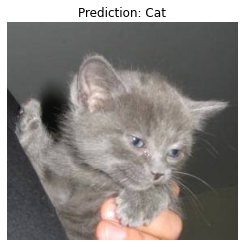

In [53]:
# Example usage
test_image_path = (r"C:\Users\Aniket Vijay Ubale\Desktop\SVM\cats\cat.28.jpg")
predict_and_display(test_image_path)
